Contributors: Soorya Raja Venkataramanan (svenka34),
              Vikram Dara (vdara2)

Link to video: https://youtu.be/xvdU-ChbJbE

In [589]:
#Import relevant libraries.
import pandas as pd 
import random
from sklearn.cluster import KMeans 
import seaborn as sns
import numpy as np
import datetime
from scipy import stats as st
import matplotlib.pyplot as plt
print("Done Importing")

Done Importing


Mounting to google drive where data is stored.

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Reading in the data in a Pandas dataframe.

In [ ]:
#Reading and storing the data in a Pandas DataFrame.
df = pd.read_csv("/content/drive/MyDrive/Datathon/SheetPullData.csv")

# Exploratory Data Analysis

In [ ]:
#Checking variables avaiable in the DataFrame.
df.columns

Index(['HH_ID', 'Roll_ID', 'Roll_Type', 'Timestamp', 'Time_since_last_pull',
       'Sheets'],
      dtype='object')

In [ ]:
#Checking the types that each variable is stored in.
df.dtypes

HH_ID                    object
Roll_ID                   int64
Roll_Type                object
Timestamp                object
Time_since_last_pull    float64
Sheets                  float64
dtype: object

In [ ]:
#Exploratory Data Analysis
#Looking at basic metrics of the numeric data.
df.describe()

,Roll_ID,Time_since_last_pull,Sheets
count,12785.000000,1.278500e+04,12785.000000
mean,10588.970747,6.551034e+03,4.802993
std,3361.010618,4.400347e+04,3.011595
min,-2557.000000,1.000000e+00,-11.188826
25%,10682.000000,1.100000e+01,2.726480
50%,11758.000000,4.660000e+02,4.654340
75%,12144.000000,7.757000e+03,6.749241
max,13655.000000,4.229427e+06,24.103288


In [ ]:
#Checking for and removing any missing data.
print("Shape of dataset before droping missing values: " + str(df.shape))
df.dropna(inplace = True)
print("Shape of dataset after droping missing values: " + str(df.shape))

Shape of dataset before droping missing values: (12785, 6)
Shape of dataset after droping missing values: (12785, 6)


Text(0, 0.5, 'Sheets')

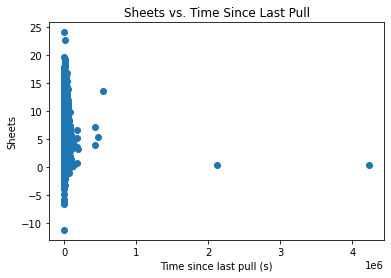

In [ ]:
#Scatterplot of the data to check the distribution of the data.
plt.scatter(df['Time_since_last_pull'], df['Sheets'])
plt.title('Sheets vs. Time Since Last Pull')
plt.xlabel('Time since last pull (s)')
plt.ylabel('Sheets')

In [ ]:
#Variable 'Time_since_last_pull' is in seconds
#Sorting the 'Timestamp' variable in increasing order to verify the data found in 'Time_since_last_pull'

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values('Timestamp').reset_index()
df.head(20)

,index,HH_ID,Roll_ID,Roll_Type,Timestamp,Time_since_last_pull,Sheets
0,4171,C,1712,Small,2019-09-25 21:40:24,5221.0,5.720330
1,4172,C,1712,Small,2019-09-25 21:40:47,23.0,5.660134
2,4173,C,1712,Small,2019-09-26 06:56:51,33364.0,4.426006
3,4174,C,1712,Small,2019-09-26 06:57:21,30.0,5.697719
4,4175,C,1712,Small,2019-09-26 09:21:36,8655.0,6.352076
5,4176,C,1712,Small,2019-09-26 09:22:37,61.0,5.420936
6,4177,C,1712,Small,2019-09-26 16:38:57,26180.0,6.481646
7,4178,C,1712,Small,2019-09-26 22:24:47,20750.0,5.564513
8,4179,C,1712,Small,2019-09-26 22:38:33,826.0,2.757245
9,4180,C,1712,Small,2019-09-26 22:39:52,79.0,4.104602


# Task Definition

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,index,Roll_ID,Time_since_last_pull,Sheets
count,5678.000000,5678.000000,5678.000000,5678.000000
mean,7216.548609,10538.304685,16.716978,4.774348
std,3641.071408,3333.428517,18.701846,3.067886
min,5.000000,-2557.000000,1.000000,-11.188826
25%,4315.250000,10682.000000,4.000000,2.562806
50%,7781.000000,11756.000000,9.000000,4.755818
75%,10257.750000,12064.000000,22.000000,6.989033
max,12784.000000,13655.000000,99.000000,24.103288


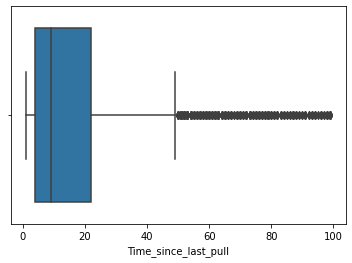

In [ ]:
#Boxplot and exploratory data analysis on the 'Time_since_last_pull' variable (excluding a few outliers) to determine task definition.
sns.boxplot('Time_since_last_pull', data = df[df['Time_since_last_pull'] < 1e2])

df[df['Time_since_last_pull'] < 1e2].describe()

The average time it takes to begin a new task is around 16 seconds. To slightly overestimate, we have decided to set our task definition to be 22 seconds to start a new task. 

In [ ]:
#Spliting data set into two to aggregate based on task definition found above.
df_g = df[df['Time_since_last_pull'] >= 22].sort_values('Timestamp').reset_index()
df_l = df[df['Time_since_last_pull'] < 22].sort_values('Timestamp').reset_index()
df_g.drop(['level_0', 'index'], axis = 1, inplace = True)
df_l.drop(['level_0', 'index'], axis = 1, inplace = True)


df_g['Total_Sheets'] = df_g['Sheets']
df_g['Total_Pulls'] = 1
df_g.head()

,HH_ID,Roll_ID,Roll_Type,Timestamp,Time_since_last_pull,Sheets,Total_Sheets,Total_Pulls
0,C,1712,Small,2019-09-25 21:40:24,5221.0,5.720330,5.720330,1
1,C,1712,Small,2019-09-25 21:40:47,23.0,5.660134,5.660134,1
2,C,1712,Small,2019-09-26 06:56:51,33364.0,4.426006,4.426006,1
3,C,1712,Small,2019-09-26 06:57:21,30.0,5.697719,5.697719,1
4,C,1712,Small,2019-09-26 09:21:36,8655.0,6.352076,6.352076,1


# Combining Tasks

In [ ]:
#Aggregating sheets into tasks using task definition
df_g_t = df_g.set_index('Timestamp')
df_g_t = df_g_t.loc[~df_g_t.index.duplicated(keep='first')]
#count = 0
total = list(df_g['Sheets'])
pull = list(df_g['Total_Pulls'])
#print(total)
for i in df_l['Timestamp']:
  idx = df_g_t.index[df_g_t.index.get_loc(i, method='nearest')]
  j = df_g.loc[df_g['Timestamp'] == idx]
  k = df_l.loc[df_l['Timestamp'] == i]
  #lst_idx = total.index(j['Sheets'])
  j_f = float(j['Sheets'])
  k_f = float(k['Sheets'])
  total[df_g_t.index.get_loc(i, method='nearest')] = j_f + k_f
  pull[df_g_t.index.get_loc(i, method='nearest')] += 1 
  #count += 1
#print(total)
df_g['Total_Sheets'] =  total
df_g['Total_Pulls'] = pull

,Roll_ID,Time_since_last_pull,Sheets,Total_Sheets,Total_Pulls
count,8533.000000,8.533000e+03,8533.000000,8533.000000,8533.000000
mean,10628.332240,9.811497e+03,4.826775,6.366777,1.498301
std,3387.316858,5.356597e+04,2.943324,4.387875,0.870361
min,-2557.000000,2.200000e+01,-11.188826,-7.771117,1.000000
25%,10761.000000,4.570000e+02,2.846286,3.451905,1.000000
50%,11768.000000,4.576000e+03,4.618301,5.432745,1.000000
75%,12144.000000,1.188400e+04,6.570645,8.337304,2.000000
max,13655.000000,4.229427e+06,22.661269,29.615914,9.000000


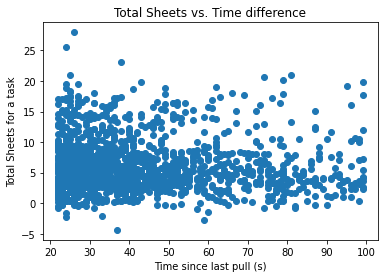

In [ ]:
#Renaming dataframe to 'Sheets' for easy access and referal.
plt.scatter(df_g[df_g['Time_since_last_pull'] < 1e2]['Time_since_last_pull'], df_g[df_g['Time_since_last_pull'] < 1e2]['Total_Sheets'])
plt.title('Total Sheets vs. Time difference')
plt.xlabel('Time since last pull (s)')
plt.ylabel('Total Sheets for a task')


sheets = df_g
sheets.describe()

# Data Insights

In [ ]:
sheets[sheets['Sheets'] != sheets['Total_Sheets']]

,HH_ID,Roll_ID,Roll_Type,Timestamp,Time_since_last_pull,Sheets,Total_Sheets,Total_Pulls
18,C,1712,Small,2019-09-27 22:31:55,19486.0,4.967835,5.688957,2
19,C,1712,Small,2019-09-28 00:43:51,7910.0,4.176637,5.005836,2
20,C,1712,Small,2019-09-28 01:53:42,4187.0,5.048840,5.165338,2
21,C,1712,Small,2019-09-28 08:47:58,24855.0,3.129683,6.114729,2
25,A,1207,Small,2019-09-28 16:08:03,6266.0,4.479940,5.592776,4
...,...,...,...,...,...,...,...,...
8511,C,13015,Big,2020-09-03 12:38:00,7258.0,2.588216,5.260661,2
8516,C,13015,Big,2020-09-03 22:16:29,5494.0,1.946790,3.862549,2
8517,C,13015,Big,2020-09-04 07:34:54,33505.0,0.775820,2.550438,3
8518,C,13015,Big,2020-09-04 07:35:28,30.0,1.915759,3.989127,2


In [530]:
#Converting 'HH_ID' to a numeric variable
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
sheets['ID'] = oe.fit_transform(sheets[['HH_ID']])
sheets['Type'] = oe.fit_transform(sheets[['Roll_Type']])
sheets.head()


,HH_ID,Roll_ID,Roll_Type,Timestamp,Time_since_last_pull,Sheets,Task,Total_Sheets,Total_Pulls,ID,Type
0,C,1712,Small,2019-09-25 21:40:24,5221.0,5.720330,0,5.720330,1,2.0,1.0
1,C,1712,Small,2019-09-25 21:40:47,23.0,5.660134,0,5.660134,1,2.0,1.0
2,C,1712,Small,2019-09-26 06:56:51,33364.0,4.426006,0,4.426006,1,2.0,1.0
3,C,1712,Small,2019-09-26 06:57:21,30.0,5.697719,0,5.697719,1,2.0,1.0
4,C,1712,Small,2019-09-26 09:21:36,8655.0,6.352076,0,6.352076,1,2.0,1.0


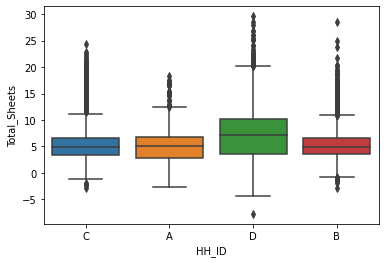

In [ ]:
#Boxplots of the 'Sheet' variable subsetted and organized by each household id/type.
sns.boxplot(x = 'HH_ID', y = 'Total_Sheets', data = sheets)

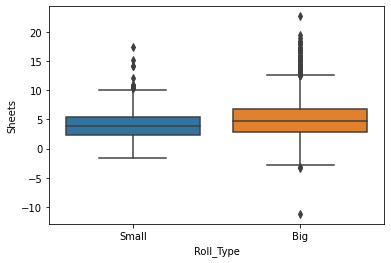

In [ ]:
#Boxplots of the 'Sheet' variable subsetted and organized by each roll type.
sns.boxplot(x = 'Roll_Type', y = 'Sheets', data = sheets)

In [532]:
#Subsetting data to exclude a few outliers.
sh = sheets[sheets['Time_since_last_pull'] < 1e3]

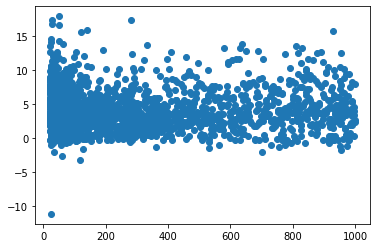

In [534]:
#Subsetting data to a range of values for easier clustering algorithm process.
sh_sub = sh[sh['Time_since_last_pull'] > 22]
plt.scatter(sh_sub['Time_since_last_pull'], sh_sub['Sheets'])

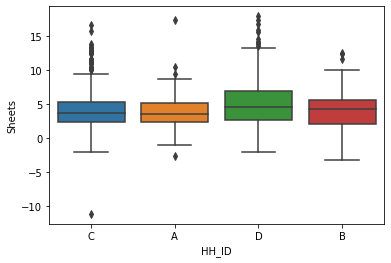

In [535]:
sns.boxplot(x = 'HH_ID', y = 'Sheets', data = sh_sub)

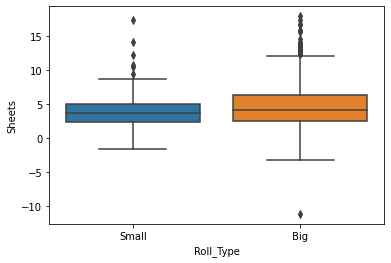

In [536]:
sns.boxplot(x = 'Roll_Type', y = 'Sheets', data = sh_sub)

# Clustering Algorithm

In [551]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [552]:
X = sh_sub[['Total_Pulls', 'Total_Sheets', 'ID', 'Type']].values
#X

In [553]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [554]:
k_means_labels = k_means.labels_
k_means_labels

array([3, 3, 3, ..., 3, 0, 0], dtype=int32)

In [555]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 1.16945373,  2.00088059,  2.18729097,  0.12263099],
       [ 1.7793345 ,  9.2092156 ,  2.4938704 ,  0.05604203],
       [ 2.4845815 , 16.40348489,  2.51982379,  0.01762115],
       [ 1.27796235,  5.21158654,  2.04651163,  0.15282392]])

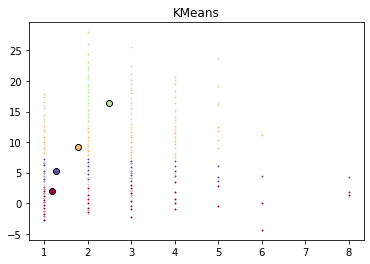

In [556]:
#Plotting the k-means results
#Borrowed from IBM Data Science
fig = plt.figure(figsize=(6, 4))

colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len(k_means.cluster_centers_)), colors):

    my_members = (k_means_labels == k)
    
    cluster_center = k_means_cluster_centers[k]
    
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans')

plt.show()

# Prediction and Task Assignment

In [557]:
cl = k_means.predict(sheets[['Total_Pulls', 'Total_Sheets', 'ID', 'Type']])
sheets['Task'] = cl

In [558]:
sheets

,HH_ID,Roll_ID,Roll_Type,Timestamp,Time_since_last_pull,Sheets,Task,Total_Sheets,Total_Pulls,ID,Type
0,C,1712,Small,2019-09-25 21:40:24,5221.0,5.720330,3,5.720330,1,2.0,1.0
1,C,1712,Small,2019-09-25 21:40:47,23.0,5.660134,3,5.660134,1,2.0,1.0
2,C,1712,Small,2019-09-26 06:56:51,33364.0,4.426006,3,4.426006,1,2.0,1.0
3,C,1712,Small,2019-09-26 06:57:21,30.0,5.697719,3,5.697719,1,2.0,1.0
4,C,1712,Small,2019-09-26 09:21:36,8655.0,6.352076,3,6.352076,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
8528,C,13015,Big,2020-09-05 01:13:00,10267.0,2.967675,0,2.967675,1,2.0,0.0
8529,C,13015,Big,2020-09-05 05:29:37,15397.0,2.938943,0,0.934394,2,2.0,0.0
8530,C,13015,Big,2020-09-05 09:40:12,15035.0,0.116960,0,0.116960,1,2.0,0.0
8531,C,13015,Big,2020-09-05 11:07:14,5220.0,0.931451,0,0.931451,1,2.0,0.0


In [566]:
print(sheets['Task'].value_counts().sort_index())

0    2279
1    1950
2     835
3    3469
Name: Task, dtype: int64


In [ ]:
#df[df['Sheets'] < 0]['Task'] = 'Reroll'
#df.loc[df['Sheets'] < 0, 'Task'] = 'Reroll/Rewound'

# Alternative Approaches

In [567]:
from sklearn.cluster import AgglomerativeClustering

In [568]:
agg = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
agg.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4)

In [569]:
from scipy.spatial import distance_matrix
from scipy.cluster import hierarchy
dist_matrix = distance_matrix(X,X)
Z = hierarchy.linkage(dist_matrix, 'complete')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


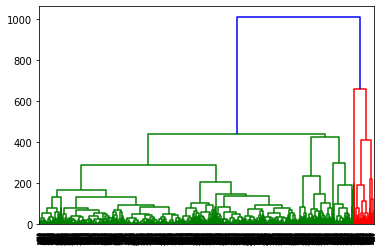

In [570]:
dendro = hierarchy.dendrogram(Z)

# Conclusions: Prediction Insights

In [584]:
sheets.groupby('Task')['Total_Pulls'].describe()

,count,mean,std,min,25%,50%,75%,max
Task,,,,,,,,
0,2279.0,1.220711,0.716659,1.0,1.0,1.0,1.0,9.0
1,1950.0,1.768718,0.964929,1.0,1.0,2.0,2.0,9.0
2,835.0,2.502994,0.847300,1.0,2.0,2.0,3.0,7.0
3,3469.0,1.286826,0.671467,1.0,1.0,1.0,1.0,8.0


In [585]:
sheets.groupby('Task')['Total_Sheets'].describe()

,count,mean,std,min,25%,50%,75%,max
Task,,,,,,,,
0,2279.0,1.945134,1.253142,-7.771117,1.080803,2.231405,2.984023,3.651415
1,1950.0,9.303720,1.500312,6.818300,8.062499,9.000270,10.356688,12.905485
2,835.0,16.236981,2.630341,12.628065,14.185790,15.749879,17.675628,29.615914
3,3469.0,5.244917,0.996944,3.505983,4.392878,5.194779,6.012206,7.506397


In [587]:
sheets.groupby(['Task', 'HH_ID'])['Total_Sheets'].describe()

count       mean       std  ...        50%        75%        max
Task HH_ID                               ...                                 
0    A       267.0   1.860701  1.077535  ...   1.972073   2.723462   3.503062
     B       500.0   1.698678  1.360425  ...   1.884366   2.996628   3.562251
     C       559.0   2.155657  1.138702  ...   2.395914   3.125273   3.587028
     D       953.0   1.974609  1.281540  ...   2.304693   2.966780   3.651415
1    A       124.0   9.056484  1.426227  ...   8.532212   9.823791  12.627483
     B       287.0   9.363258  1.559787  ...   8.999315  10.527107  12.813115
     C       256.0   9.097739  1.522717  ...   8.608901  10.036122  12.729356
     D      1283.0   9.355397  1.484951  ...   9.091007  10.405518  12.905485
2    A        22.0  15.443627  1.592132  ...  15.263798  16.620408  18.424931
     B       105.0  15.922892  2.585508  ...  15.174785  16.991389  28.616499
     C       154.0  16.469385  2.481313  ...  16.191966  18.074677  24.399198
     D       554.0  16.263412  2.705168  ...  15.748076  17.739374  29.615914
3    A       438.0   5.485347  1.069296  ...   5.599430   6.328409   7.506397
     B      1125.0   5.161715  0.935730  ...   5.070841   5.852861   7.392206
     C      1043.0   5.164764  0.964989  ...   5.131664   5.861396   7.327079
     D       863.0   5.328224  1.048089  ...   5.335255   6.216243   7.177332

[16 rows x 8 columns]

In [588]:
sheets.groupby(['Task', 'HH_ID'])['Total_Pulls'].describe()

count      mean       std  min  25%  50%  75%  max
Task HH_ID                                                     
0    A       267.0  1.265918  0.761182  1.0  1.0  1.0  1.0  7.0
     B       500.0  1.280000  0.806785  1.0  1.0  1.0  1.0  8.0
     C       559.0  1.220036  0.747679  1.0  1.0  1.0  1.0  9.0
     D       953.0  1.177335  0.627646  1.0  1.0  1.0  1.0  9.0
1    A       124.0  2.120968  1.233626  1.0  1.0  2.0  3.0  9.0
     B       287.0  1.933798  0.911738  1.0  1.0  2.0  2.0  5.0
     C       256.0  1.941406  1.009991  1.0  1.0  2.0  2.0  7.0
     D      1283.0  1.663289  0.919769  1.0  1.0  1.0  2.0  8.0
2    A        22.0  2.363636  0.847711  1.0  2.0  2.0  3.0  4.0
     B       105.0  2.533333  0.877789  1.0  2.0  2.0  3.0  5.0
     C       154.0  2.688312  0.904018  1.0  2.0  2.0  3.0  6.0
     D       554.0  2.451264  0.819280  1.0  2.0  2.0  3.0  7.0
3    A       438.0  1.278539  0.612640  1.0  1.0  1.0  1.0  7.0
     B      1125.0  1.270222  0.649290  1.0  1.0  1.0  1.0  7.0
     C      1043.0  1.234899  0.646450  1.0  1.0  1.0  1.0  7.0
     D       863.0  1.375435  0.746499  1.0  1.0  1.0  2.0  8.0